Author: Thibeau Wouters

# Physical Modelling of Complex Systems: Assignment 6

##### Import packages

In [77]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

import sympy as sp # need something to solve equations

from scipy.signal import find_peaks # need something to find peaks

In [2]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     'font.serif': 'Modern Roman',
     "figure.figsize": (8, 4),
    "axes.titlesize" : 26,
    "axes.labelsize" : 28,
    "lines.linewidth": 3,
     "legend.fontsize":24,
    "lines.markersize" : 10,
     "legend.fontsize": 16,
    "xtick.labelsize" : 24,
    "ytick.labelsize" : 24})

## 6.1 - The Lorenz system

In [106]:
def r_Hopf(b, sigma):
    return (sigma*(sigma + b + 3))/(sigma - b - 1)

Define the following functions to easily plot eigenvalues, obtained numerically using Sympy.

In [107]:
def get_separate_eigenvalues(eigenvalues_list):
    '''Given a list of eigenvalues for various values of parameters, separate them.'''
    
    # Check how many eigenvalues there are (three for these exercises)
    number_of_eigenvals = len(eigenvalues_list[0])
    
    # Create an empty dictionary
    
    result = {}
    for i in range(number_of_eigenvals):
        result[i] = []
    
    for eigenvalues in eigenvalues_list:
        for i in range(number_of_eigenvals):
            result[i].append(complex(eigenvalues[i]))
            
    return result

In [108]:
def get_real_and_imaginary(z_list):
    '''Separate real and complex part of list of complex numbers'''
    
    x = []; y = []
    
    for z in z_list:
        x.append(z.real); y.append(z.imag)
        
    return x, y

Use the parameter values for $b$ and $\sigma$ that Lorenz used.

In [109]:
sigma = 10; b = 8/3

In [110]:
rH = r_Hopf(b, sigma)
print('The Hopf bifurcation occurs at r = %0.4f' % rH)

The Hopf bifurcation occurs at r = 24.7368


In [111]:
r_vals = np.arange(1.4, 27.1, 0.1)

Solve for the eigenvalues.

In [112]:
# Use sympy to solve for the eigenvalues
x = sp.Symbol('x')

eigenvalues_list = []

# Create a list with the eigenvalues for each value of r
for r in r_vals:
    eigenvalues = sp.solve(x**3 + (sigma + b + 1)*x**2 + b*(sigma + r)*x + 2*b*sigma*(r - 1), x)
    eigenvalues_list.append(eigenvalues)
    
Lambdas = get_separate_eigenvalues(eigenvalues_list)

Plot the results:

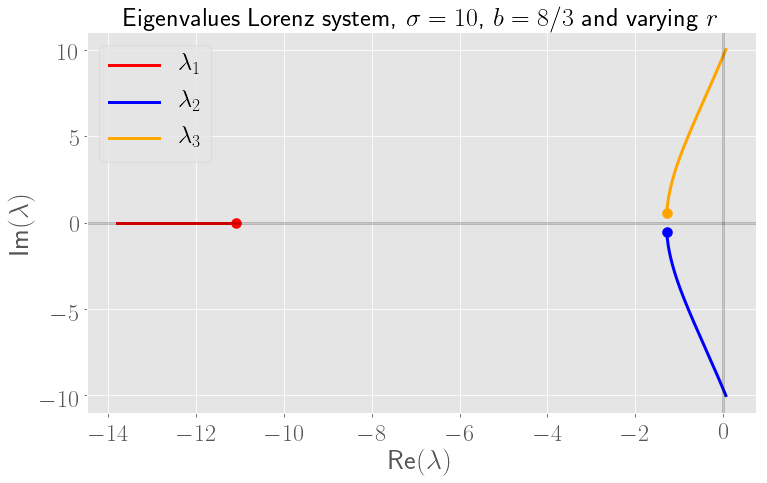

In [113]:
plt.figure(figsize = (12, 7))

# # Plot all complex eigenvalues
# plt.plot(Lambda_1_real, Lambda_1_complex, color = 'red', label = r'$\lambda_1$')
# plt.plot(Lambda_2_real, Lambda_2_complex, color = 'blue', label = r'$\lambda_2$')
# plt.plot(Lambda_3_real, Lambda_3_complex, color = 'orange', label = r'$\lambda_3$')

# # Scatter the first r value:
# plt.scatter(Lambda_1_real[0], Lambda_1_complex[0], color = 'red')
# plt.scatter(Lambda_2_real[0], Lambda_2_complex[0], color = 'blue')
# plt.scatter(Lambda_3_real[0], Lambda_3_complex[0], color = 'orange')

labels_list = [r'$\lambda_1$', r'$\lambda_2$', r'$\lambda_3$']
colors_list = ['red', 'blue', 'orange']

for i in Lambdas:
    z_list = Lambdas[i]
    x, y = get_real_and_imaginary(z_list)
    
    plt.plot(x, y, label = labels_list[i], color = colors_list[i])
    plt.scatter(x[0], y[0], color = colors_list[i])

# Make fancy, save and show
plt.xlabel(r'Re$(\lambda)$')
plt.ylabel(r'Im$(\lambda)$')
plt.title(r'Eigenvalues Lorenz system, $\sigma = 10$, $b = 8/3$ and varying $r$')
plt.legend(fontsize = 25)
plt.axhline(y=0, color='black', alpha = 0.2)
plt.axvline(x=0, color='black', alpha = 0.2)
plt.savefig('eigenvalues_Lorenz.pdf', bbox_inches = 'tight')
plt.show()

## 6.2 - The Rössler system

In [66]:
def x_dot(x, y, z):
    return - y - z

In [67]:
def y_dot(x, y, z, a = 0.2):
    return x + a*y

In [68]:
def z_dot(x, y, z, c, b = 0.2):
    return b + z*(x - c)

In [69]:
def solve_Rossler(t_vals, initial, c, a = 0.2, b = 0.2):
    '''Solves Rössler model numerically. Assume t_vals is list of times, equally spaced from each other.'''
    
    # Create empty list to save calculated values, and save initial conditions
    x_vals = []; y_vals = []; z_vals = []
    x0 = initial[0]; y0 = initial[1]; z0 = initial[2];
    
    # Get the value of Delta t for calculations
    DeltaT = abs(t_vals[1] - t_vals[0])
    
    for t in t_vals:
        if t == t_vals[0]:
            # Initial condition
            x_vals.append(x0); y_vals.append(y0); z_vals.append(z0)
            
        else:
            # Compute next value: discretised derivative
            x_val = x_vals[-1] + x_dot(x_vals[-1], y_vals[-1], z_vals[-1])*DeltaT
            y_val = y_vals[-1] + y_dot(x_vals[-1], y_vals[-1], z_vals[-1], a = 0.2)*DeltaT
            z_val = z_vals[-1] + z_dot(x_vals[-1], y_vals[-1], z_vals[-1], c, b  = 0.2)*DeltaT # watch out for the order!!
            
            # Add to list
            x_vals.append(x_val); y_vals.append(y_val);  z_vals.append(z_val)
            
    return (x_vals, y_vals, z_vals)

### 6.2.1 - Numerical exploration

$ \textbf{Phase space plots} $

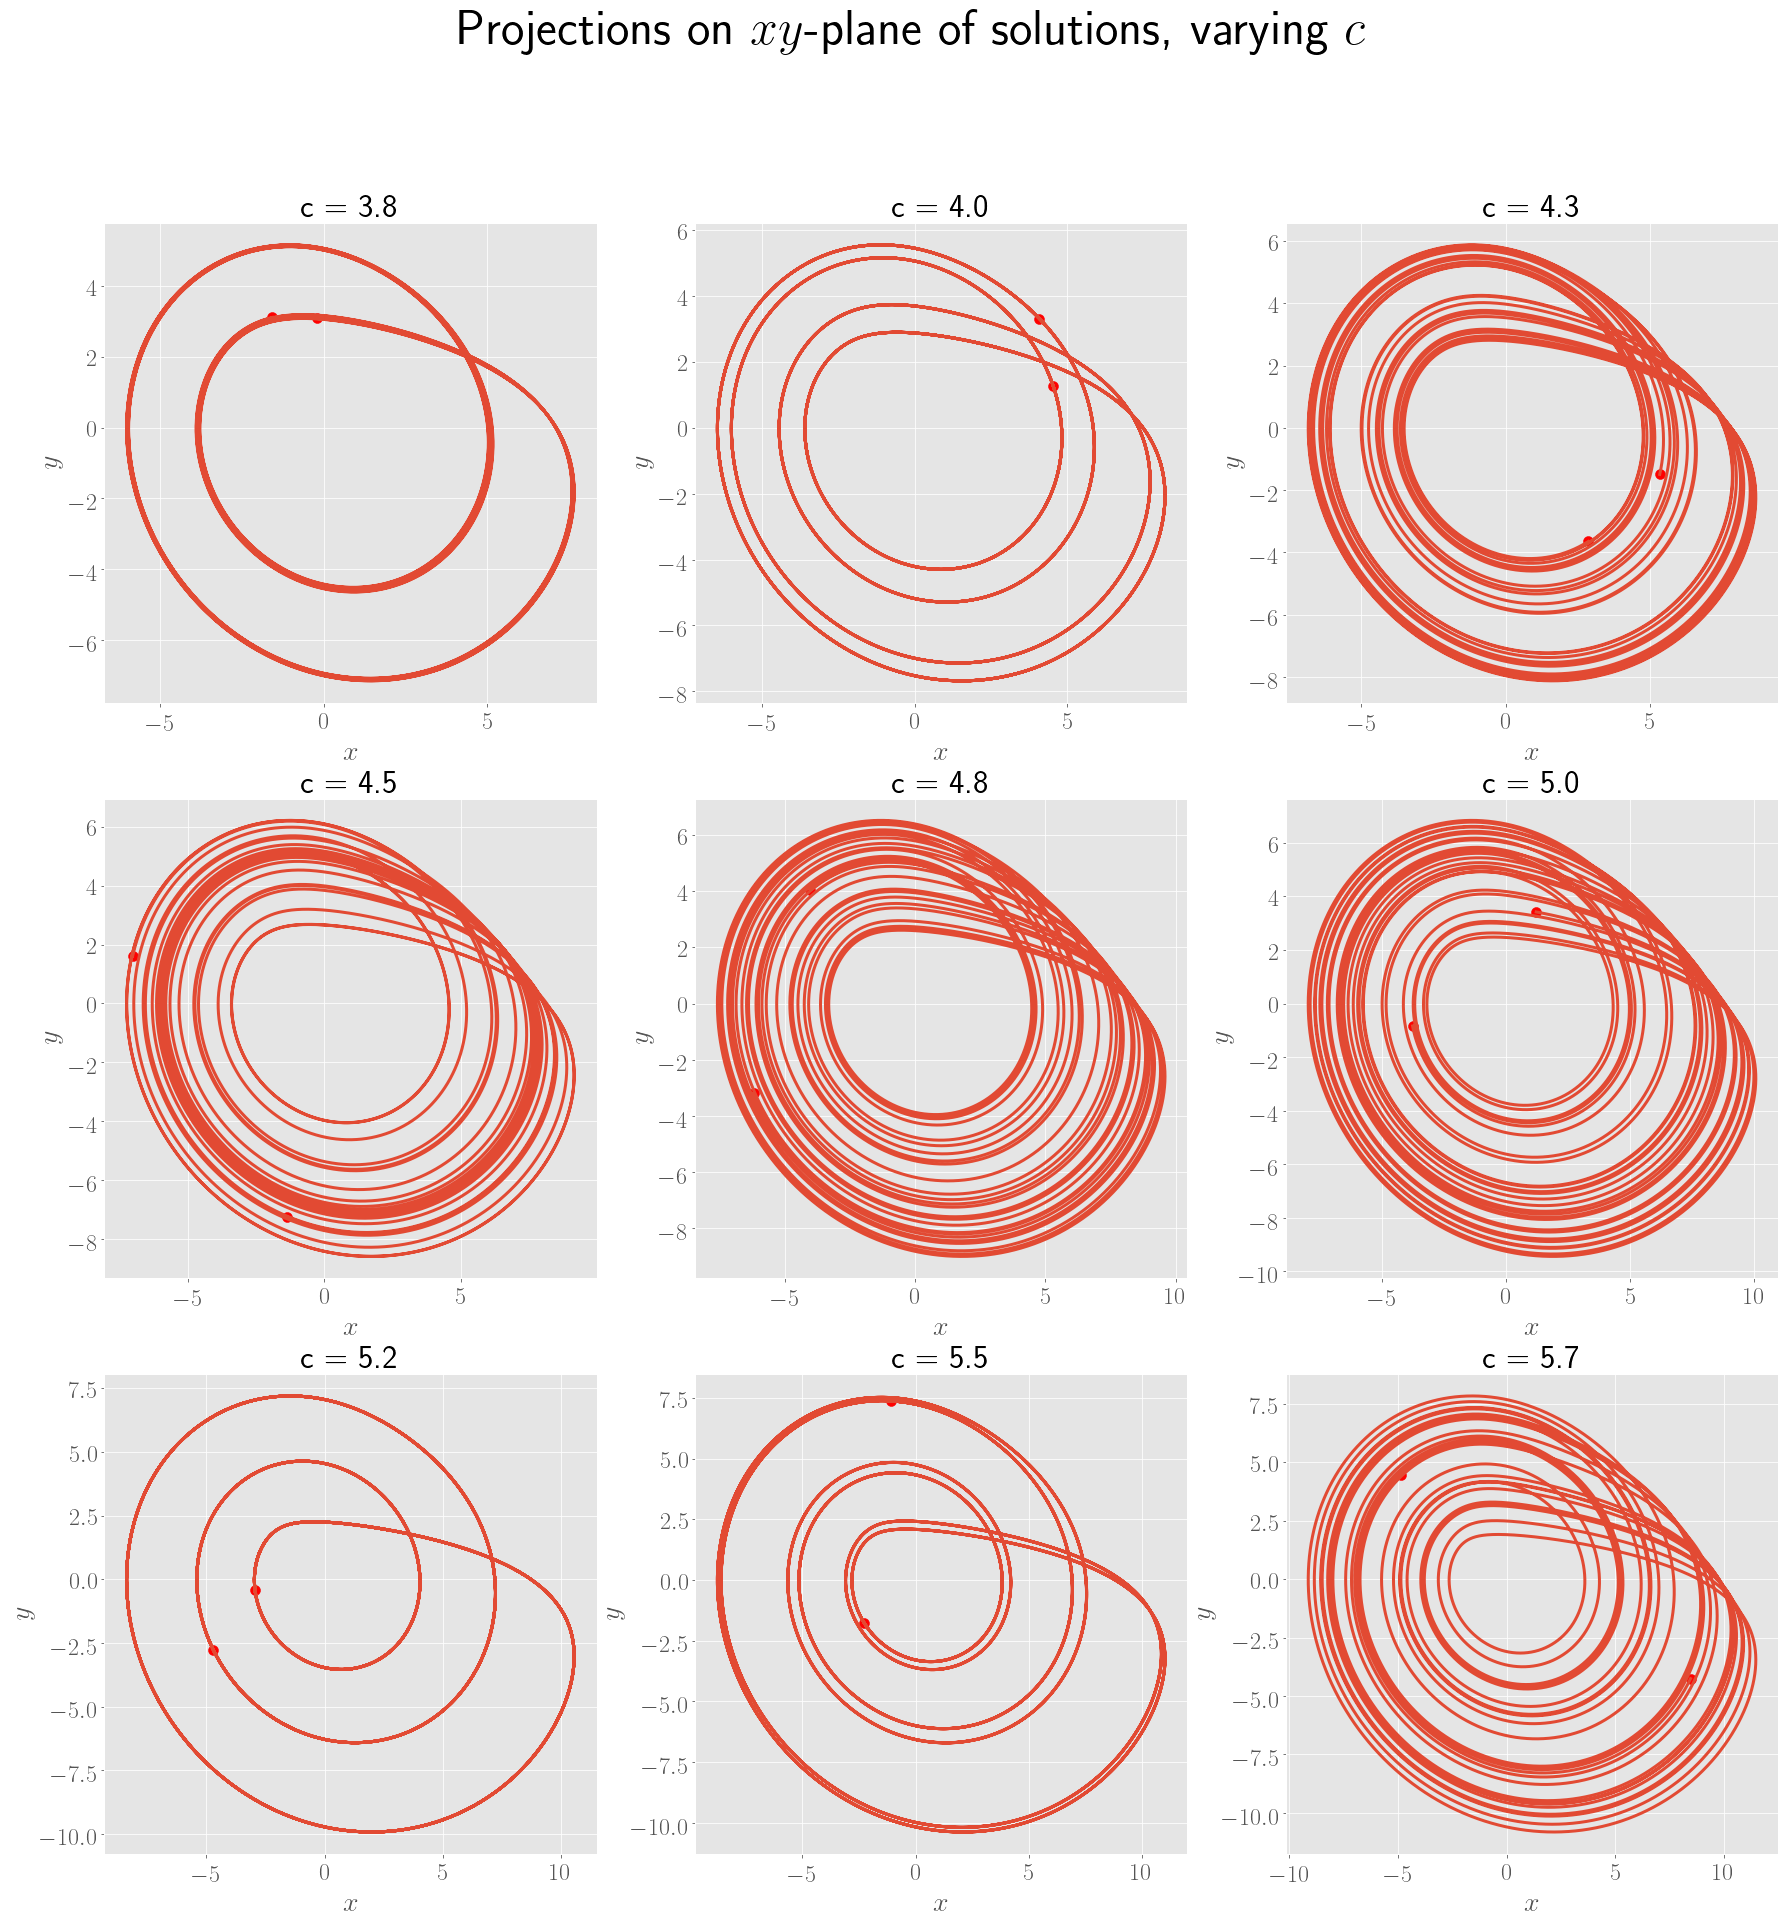

In [118]:
# Take 9 c values
c_vals = np.linspace(3.8, 5.7, 9)
title_list = ['c = %0.1f' % c for c in c_vals]

# Start the plot
fig, axs = plt.subplots(3, 3, figsize = (30, 30))

initial = (8, 8, 8)
t_vals = np.arange(0, 300, 0.001)

for i in range(len(c_vals)):
    ax = axs[i//3, i%3]
    x, y, z = solve_Rossler(t_vals, initial, c_vals[i])
    
    # Discard first half of each solution, such that the solution is on the attractor
    x_cut = x[len(x)//2:]
    y_cut = y[len(y)//2:]
    
    ax.plot(x_cut, y_cut, label = c_vals[i])
    
    ax.scatter(x_cut[0], y_cut[0], color = 'red')
    ax.scatter(x_cut[-1], y_cut[-1], color = 'red')
    
    ax.set_title(title_list[i], fontsize = 33)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

plt.suptitle(r'Projections on $xy$-plane of solutions, varying $c$', fontsize = 50)
plt.savefig('rossler_phase_plots.pdf', bbox_inches = 'tight')
plt.show()

Summary of observations from various runs:
- winding number one occurs around $c = 2.6$, then bifurcates into winding number two between $c = 2.6$ and $c = 3.0$
- winding number two stays until $c = 3.8$ or higher.

$ \textbf{Time series} $

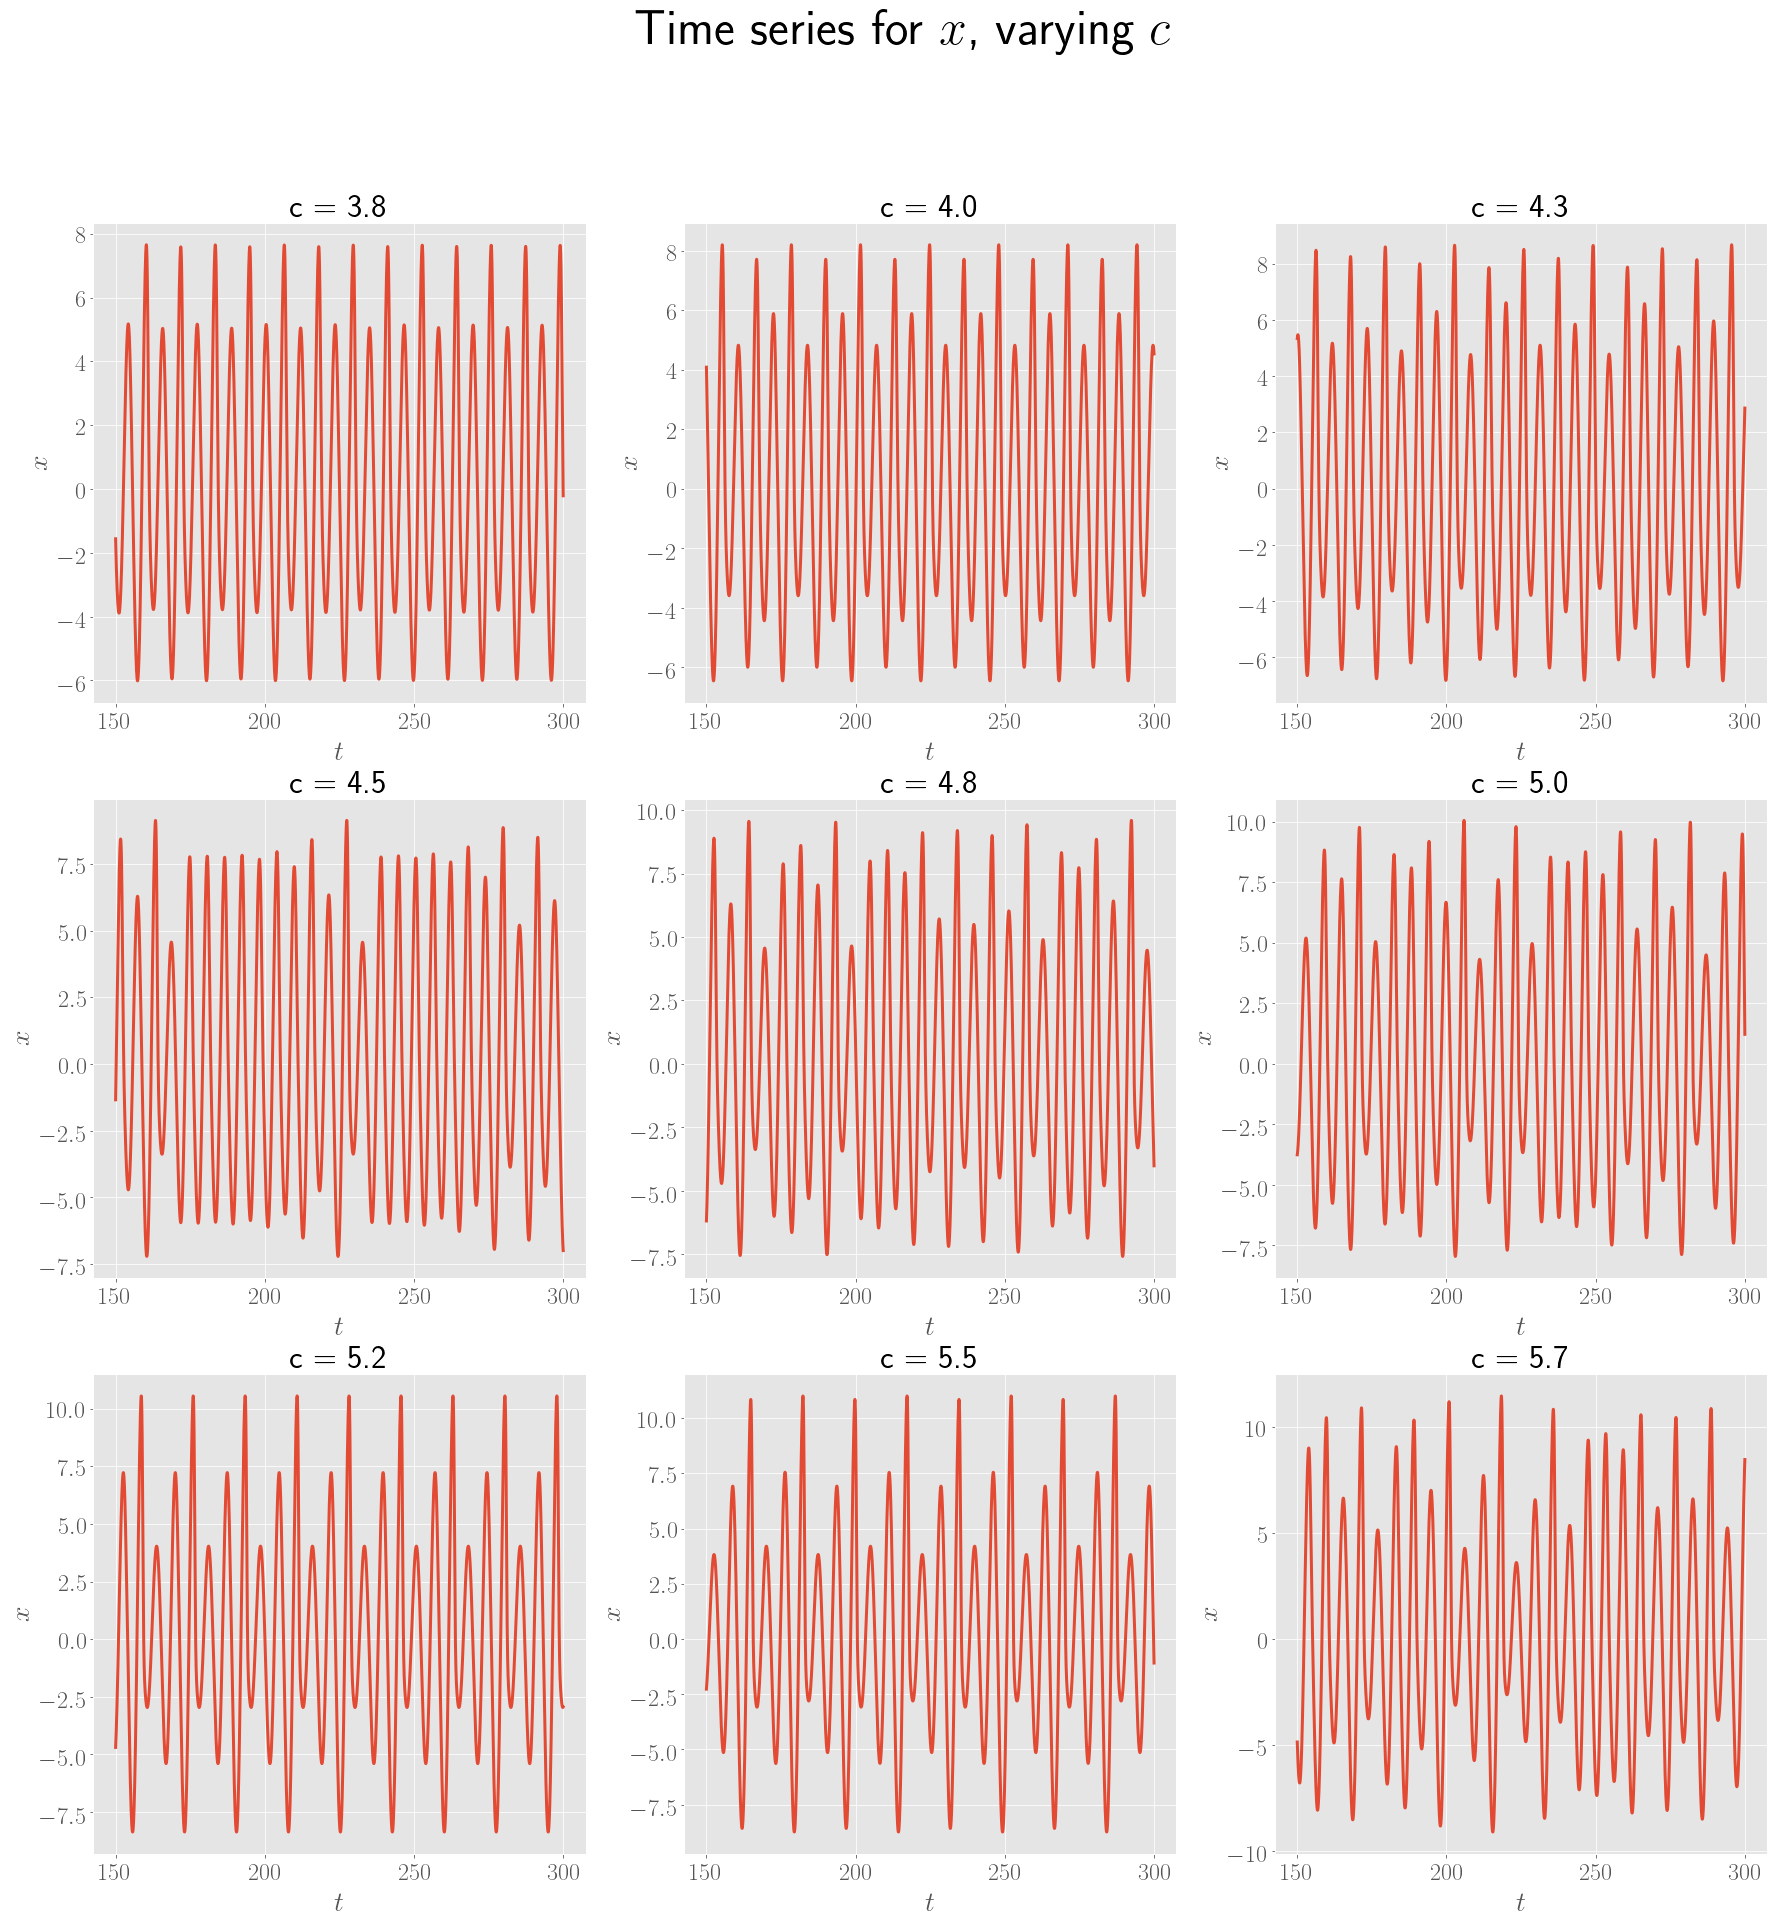

In [119]:
# Take 9 c values (copy from previous one)
c_vals = np.linspace(3.8, 5.7, 9)
title_list = ['c = %0.1f' % c for c in c_vals]

# Start the plot
fig, axs = plt.subplots(3, 3, figsize = (30, 30))

initial = (8, 8, 8)
t_vals = np.arange(0, 300, 0.001)

for i in range(len(c_vals)):
    ax = axs[i//3, i%3]
    x, y, z = solve_Rossler(t_vals, initial, c_vals[i])
    
    ax.plot(t_vals[len(t_vals)//2:], x[len(x)//2:], label = c_vals[i])
    ax.set_title(title_list[i], fontsize = 33)
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$x$')

plt.suptitle(r'Time series for $x$, varying $c$', fontsize = 50)
plt.savefig('rossler_time_series_x.pdf', bbox_inches = 'tight')
plt.show()

### 6.2.2 - Looking for chaos

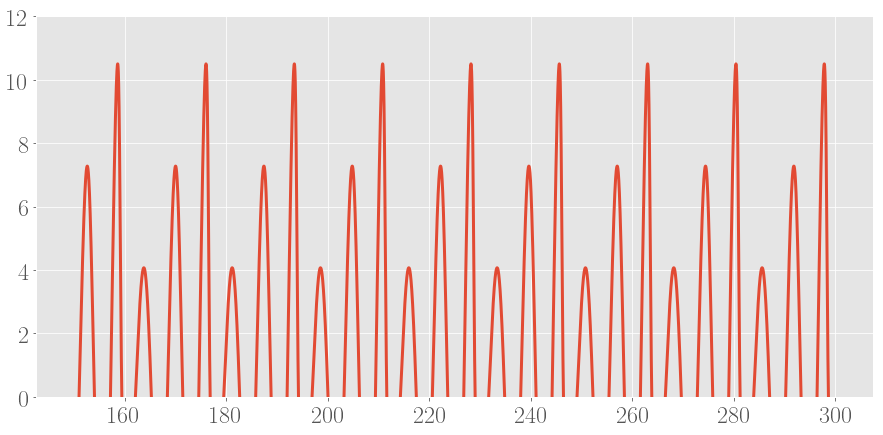

In [121]:
c = 5.2; t_vals = np.arange(0, 300, 0.001)

# Solve, and discard transient phase
x, y, z = solve_Rossler(t_vals, initial, c)
t_cut = t_vals[len(t_vals)//2:]; x_cut = x[len(x)//2:]

plt.figure(figsize = (15, 7))
plt.plot(t_cut, x_cut)
plt.ylim(0, 12)
plt.show()

In [75]:
def give_extrema(x_cut):
    '''From a time series, when transient is discarded, give the extrema values.'''
    extrema = []
    
    indices = list(find_peaks(x_cut)[0]) # this is from Scipy, gives index locations
    
    for i in indices:
        extrema.append(x_cut[i])
    return extrema

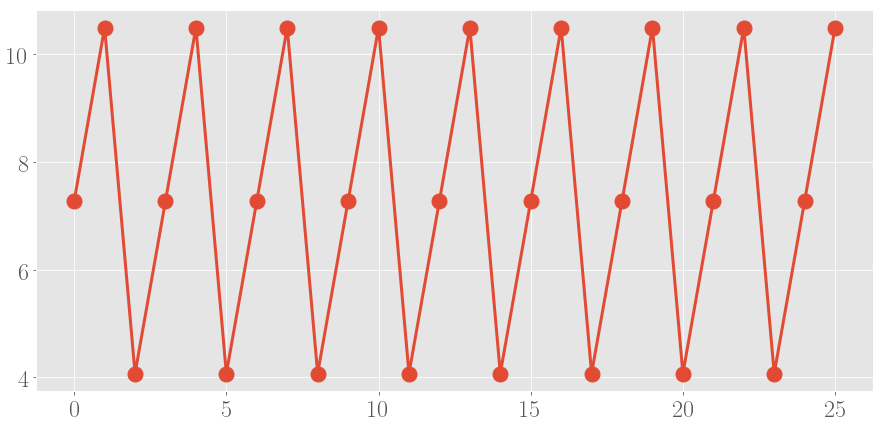

In [123]:
x_extrema = give_extrema(x_cut)

test = [i for i in range(len(x_extrema))]

plt.figure(figsize = (15, 7))
plt.plot(test, x_extrema, '-o', markersize = 15)
plt.show()

Big plot!

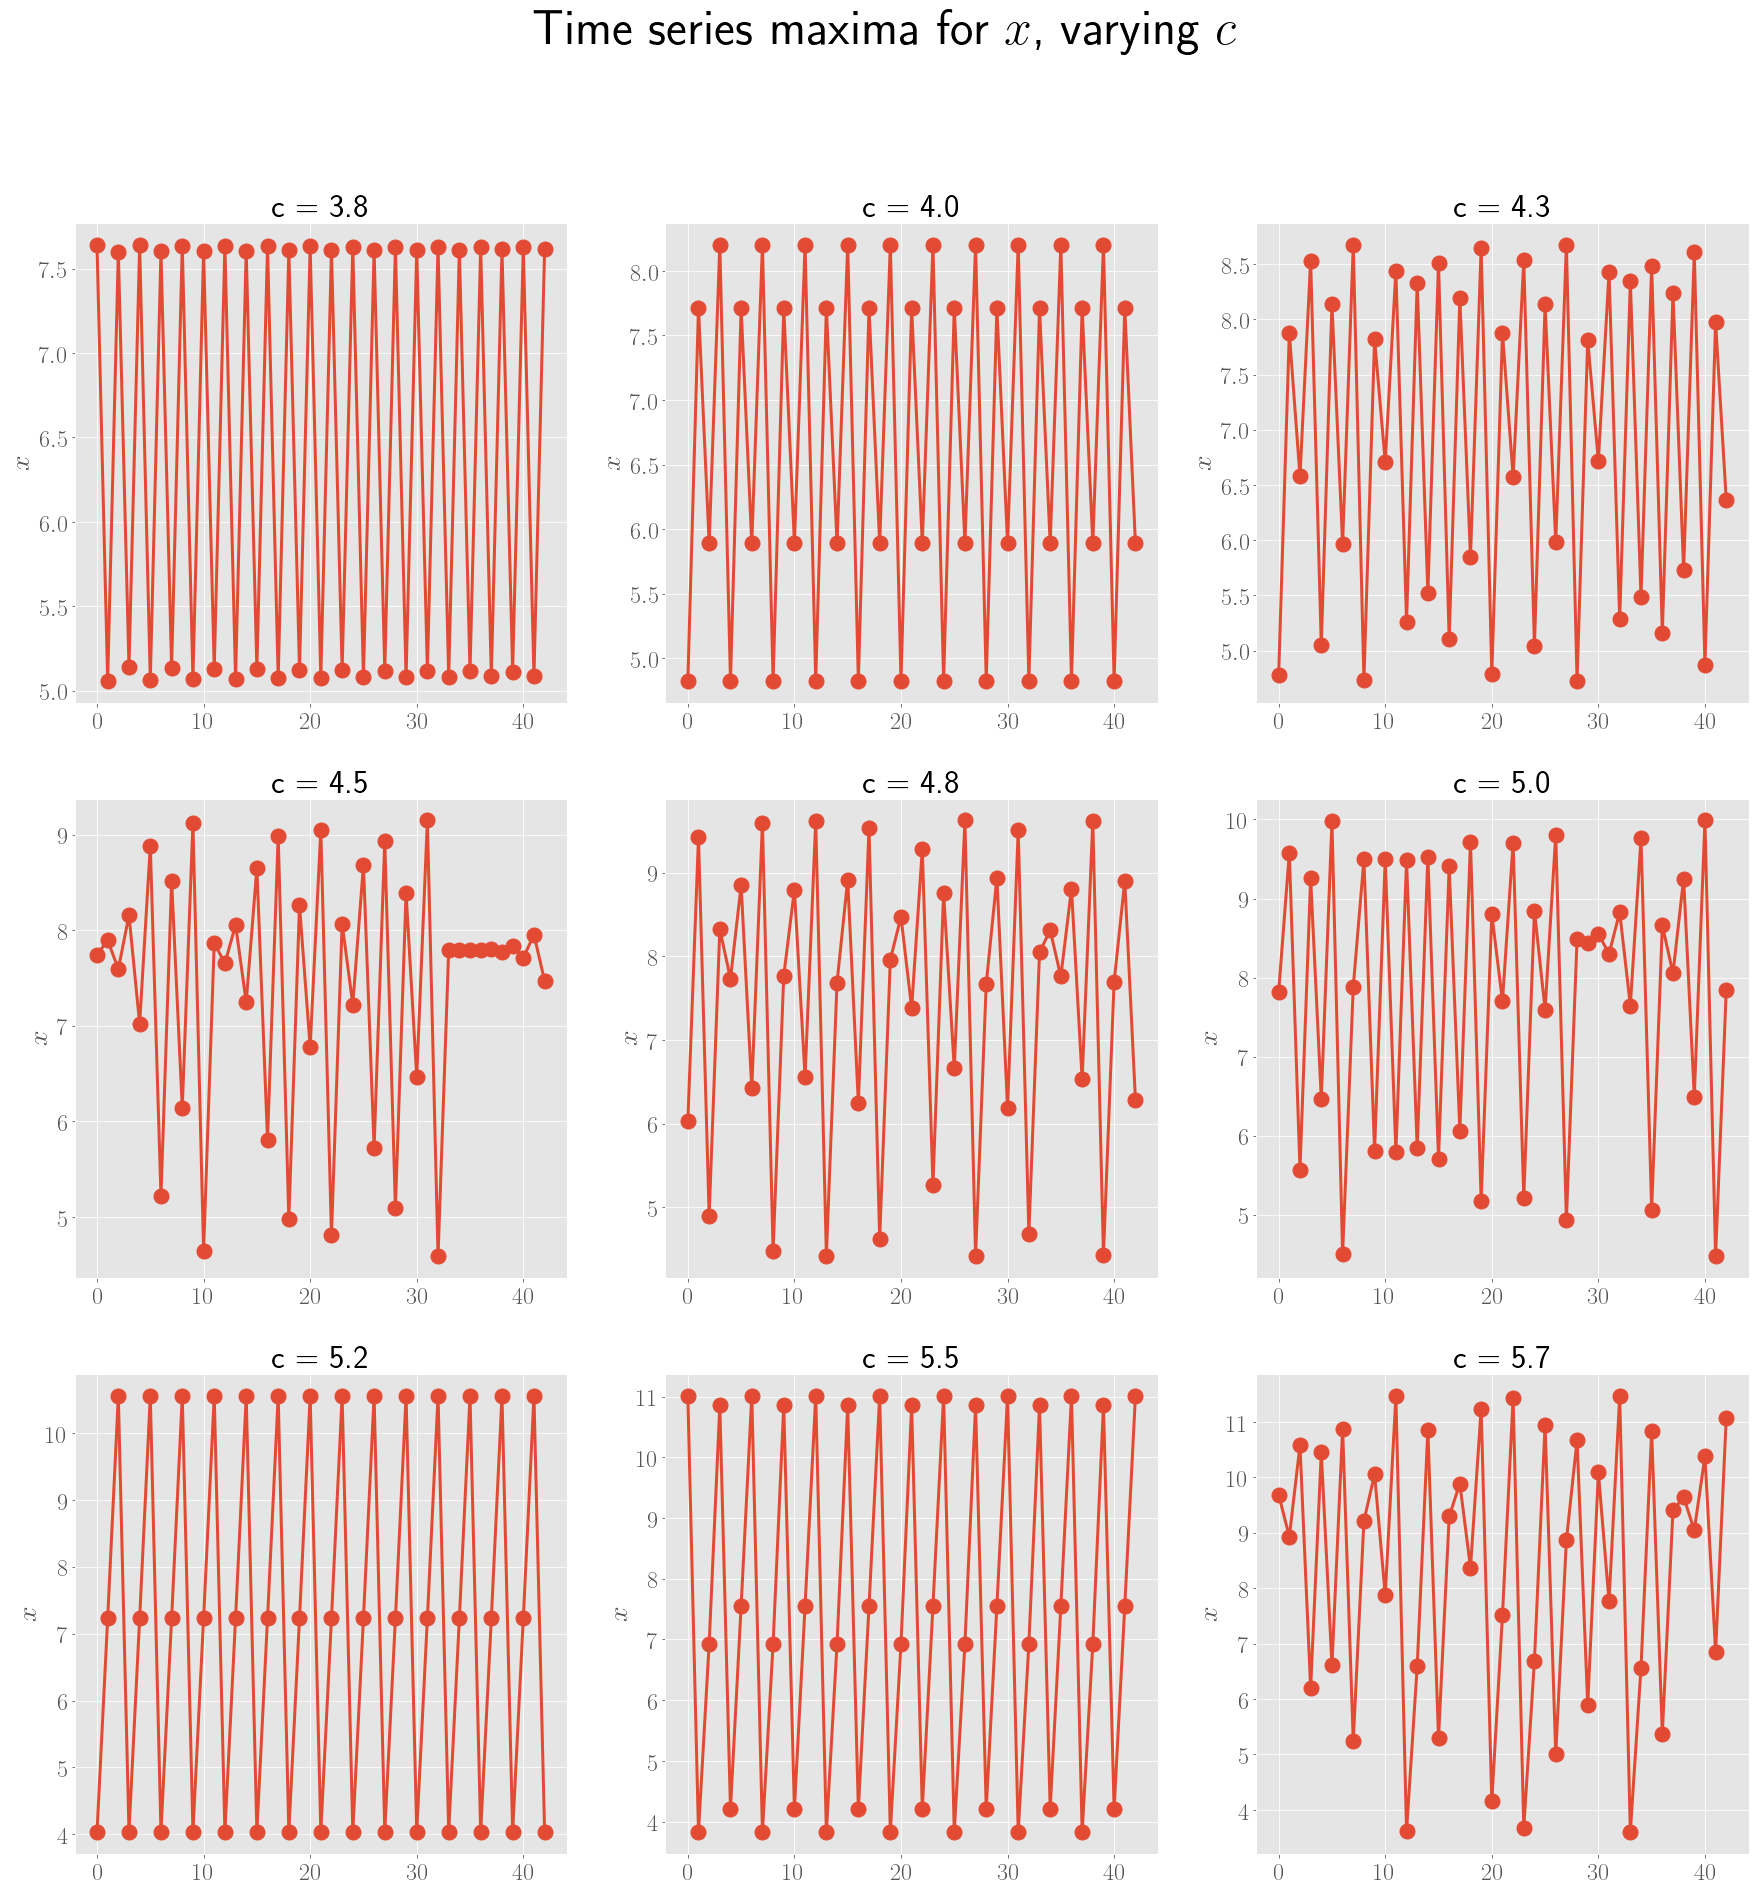

In [124]:
# Take 9 c values (copy from previous one)
c_vals = np.linspace(3.8, 5.7, 9)
title_list = ['c = %0.1f' % c for c in c_vals]

# Start the plot
fig, axs = plt.subplots(3, 3, figsize = (30, 30))

initial = (8, 8, 8)
t_vals = np.arange(0, 500, 0.001)

for i in range(len(c_vals)):
    ax = axs[i//3, i%3]
    
    x, y, z = solve_Rossler(t_vals, initial, c_vals[i])
    t_cut = t_vals[len(t_vals)//2:]; x_cut = x[len(x)//2:]
    
    x_extrema = give_extrema(x_cut)
    
    ax.plot([i for i in range(len(x_extrema))], x_extrema, '-o', markersize = 15, label = c_vals[i])
    ax.set_title(title_list[i], fontsize = 33)
    #ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$x$')

plt.suptitle(r'Time series maxima for $x$, varying $c$', fontsize = 50)
plt.savefig('rossler_x_extrema.pdf', bbox_inches = 'tight')
plt.show()

$ \textbf{Orbit diagram} $

Note: plt.plot is much faster than plt.scatter according to this reference: https://pythonmatplotlibtips.blogspot.com/2018/01/compare-pltplot-and-pltscatter-in-speed-python-matplotlib.html and this reference https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html#plot-Versus-scatter:-A-Note-on-Efficiency.

In [ ]:
c_vals_part1 = np.arange(4.05, 5.25, 0.0005)
c_vals_part2 = np.arange(5.25, 5.55, 0.001)
c_vals_part3 = np.arange(5.5, 5.75, 0.0005)

c_vals = list(c_vals_part1) + list(c_vals_part2) + list(c_vals_part3)
initial = (8, 8, 8)

test = []

plt.figure(figsize = (26, 15))

# Plot the diagram
for c in c_vals:
    if np.round(0.1*(c//0.1), 2) not in test: #can be used to see how far we are in the calculation
        print(np.round(0.1*(c//0.1), 2))
        test.append(np.round(0.1*(c//0.1), 2))
    
    # Get solutions
    t_vals = np.arange(0, 600, 0.01)
    x, y, z = solve_Rossler(t_vals, initial, c)
    
    # Get the extrema after a transient phase
    x_cut = x[len(x)//2:]
    x_extrema = give_extrema(x_cut)
    
    plt.plot([c for i in range(len(x_extrema))], x_extrema, 'o', markersize = 4, alpha = 0.075, color = 'black')

plt.xlabel(r'$c$', fontsize = 50)
plt.ylabel(r'$x$', fontsize = 50)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.title('Orbit diagram Rössler system', fontsize = 45)
plt.savefig('rossler_orbit_diagram_2.pdf', bbox_inches = 'tight')
plt.show()

### 6.2.2 - Stability of the fixed points

In [126]:
a = 0.2; b = 0.2

Define functions to get $x$, $y$ and $z$ of the fixed point.

In [127]:
def get_z_FP(a, b, c, which = 'plus'):
    
    if which == 'plus':
        return (c + np.sqrt(c**2 - 4*a*b))/(2*a)
    
    if which == 'minus':
        return (c - np.sqrt(c**2 - 4*a*b))/(2*a)

Solve for the eigenvalues

$ \textbf{Eigenvalues of the fixed point } C_+ $

Choose the range of $c$ values for the plot:

In [128]:
a = 0.2; b = 0.2
c_vals = np.arange(0.5, 20, 0.1)

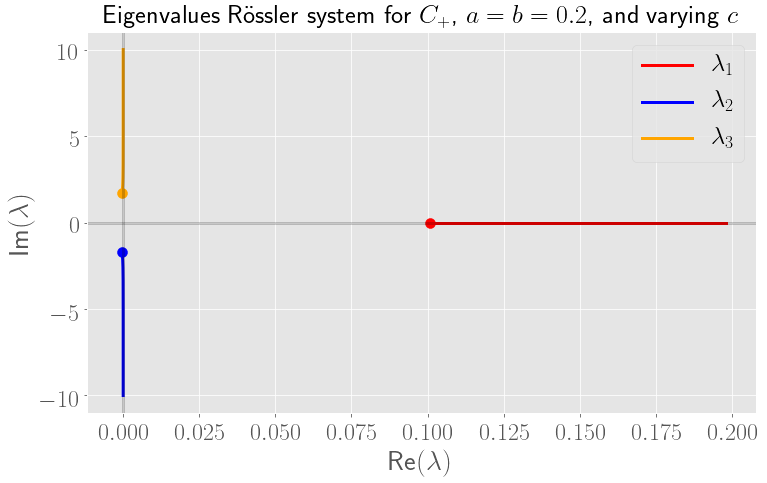

In [129]:
# Use Sympy to solve for the eigenvalues
x = sp.Symbol('x')
a = 0.2; b = 0.2
eigenvalues_list = []

# Create a list with the eigenvalues for each value of c
for c in c_vals:
    z_FP = get_z_FP(a, b, c, which = 'plus')
    eigenvalues = sp.solve(- x**3 + (a*z_FP - c + a)*x**2 + (-z_FP - 1 -a**2*z_FP + a*c)*x + 2*a*z_FP - c, x)
    eigenvalues_list.append(eigenvalues)
    
Lambdas = get_separate_eigenvalues(eigenvalues_list)

# Plot the eigenvalues:

plt.figure(figsize = (12, 7))

labels_list = [r'$\lambda_1$', r'$\lambda_2$', r'$\lambda_3$']
colors_list = ['red', 'blue', 'orange']

for i in Lambdas:
    z_list = Lambdas[i]
    x, y = get_real_and_imaginary(z_list)
    
    plt.plot(x, y, label = labels_list[i], color = colors_list[i])
    plt.scatter(x[0], y[0], color = colors_list[i])

# Make fancy, save and show
plt.xlabel(r'Re$(\lambda)$')
plt.ylabel(r'Im$(\lambda)$')
plt.title(r'Eigenvalues Rössler system for $C_+$, varying $c$')
plt.legend(fontsize = 25)
plt.axhline(y=0, color='black', alpha = 0.2)
plt.axvline(x=0, color='black', alpha = 0.2)
plt.savefig('eigenvalues_Rossler_C+.pdf', bbox_inches = 'tight')
plt.show()

Zoom in on the complex conjugated pair.

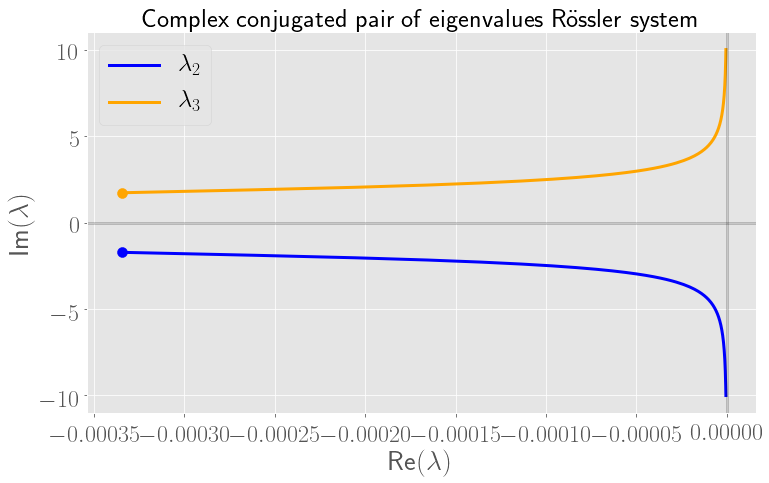

In [130]:
plt.figure(figsize = (12, 7))

labels_list = [r'$\lambda_1$', r'$\lambda_2$', r'$\lambda_3$']
colors_list = ['red', 'blue', 'orange']

for i in Lambdas:
    if i == 0:
        pass
    
    else:
        z_list = Lambdas[i]
        x, y = get_real_and_imaginary(z_list)
    
        plt.plot(x, y, label = labels_list[i], color = colors_list[i])
        plt.scatter(x[0], y[0], color = colors_list[i])

# Make fancy, save and show

plt.xlabel(r'Re$(\lambda)$')
plt.ylabel(r'Im$(\lambda)$')
plt.title(r'Complex conjugated pair of eigenvalues $C_+$ Rössler system') #  for $C_+$, $a = b = 0.2$, and varying $c$
plt.legend(fontsize = 25)
plt.axhline(y=0, color='black', alpha = 0.2)
plt.axvline(x=0, color='black', alpha = 0.2)
plt.savefig('eigenvalues_Rossler_C+_zoom.pdf', bbox_inches = 'tight')
plt.show()

$ \textbf{Eigenvalues of the fixed point } C_- $

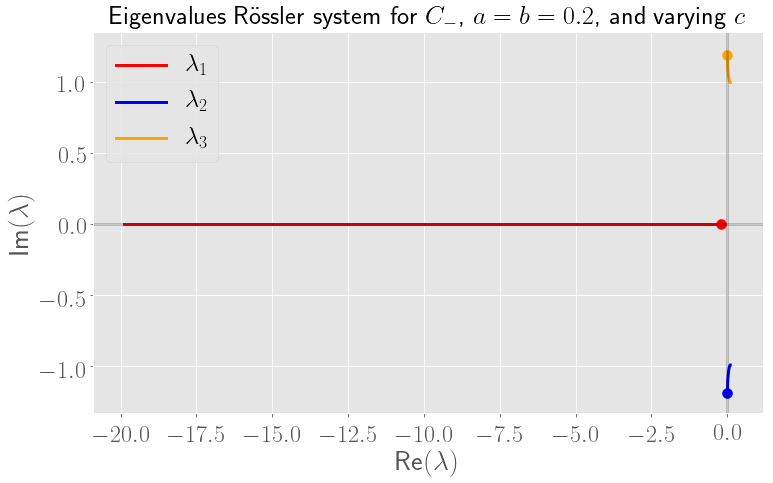

In [131]:
# Use Sympy to solve for the eigenvalues
x = sp.Symbol('x')
a = 0.2; b = 0.2
eigenvalues_list = []

# Create a list with the eigenvalues for each value of c
for c in c_vals:
    z_FP = get_z_FP(a, b, c, which = 'minus')
    eigenvalues = sp.solve(- x**3 + (a*z_FP - c + a)*x**2 + (-z_FP - 1 -a**2*z_FP + a*c)*x + 2*a*z_FP - c, x)
    eigenvalues_list.append(eigenvalues)
    
Lambdas = get_separate_eigenvalues(eigenvalues_list)

# Plot the eigenvalues:

plt.figure(figsize = (12, 7))

labels_list = [r'$\lambda_1$', r'$\lambda_2$', r'$\lambda_3$']
colors_list = ['red', 'blue', 'orange']

for i in Lambdas:
    z_list = Lambdas[i]
    x, y = get_real_and_imaginary(z_list)
    
    plt.plot(x, y, label = labels_list[i], color = colors_list[i])
    plt.scatter(x[0], y[0], color = colors_list[i])

# Make fancy, save and show
plt.xlabel(r'Re$(\lambda)$')
plt.ylabel(r'Im$(\lambda)$')
plt.title(r'Eigenvalues Rössler system for $C_-$, varying $c$')
plt.legend(fontsize = 25)
plt.axhline(y=0, color='black', alpha = 0.2)
plt.axvline(x=0, color='black', alpha = 0.2)
plt.savefig('eigenvalues_Rossler_C-.pdf', bbox_inches = 'tight')
plt.show()

Again zoom in on the complex conjugated pair

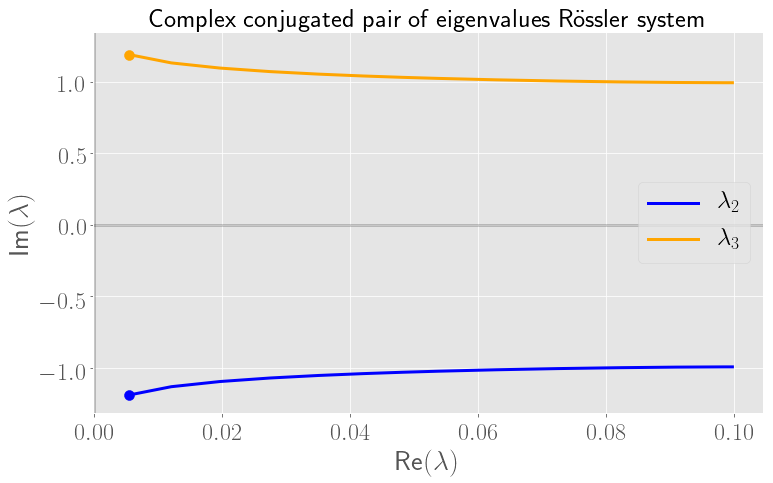

In [132]:
plt.figure(figsize = (12, 7))

labels_list = [r'$\lambda_1$', r'$\lambda_2$', r'$\lambda_3$']
colors_list = ['red', 'blue', 'orange']

for i in Lambdas:
    if i == 0:
        pass
    
    else:
        z_list = Lambdas[i]
        x, y = get_real_and_imaginary(z_list)
    
        plt.plot(x, y, label = labels_list[i], color = colors_list[i])
        plt.scatter(x[0], y[0], color = colors_list[i])

# Make fancy, save and show

plt.xlabel(r'Re$(\lambda)$')
plt.ylabel(r'Im$(\lambda)$')
plt.title(r'Complex conjugated pair of eigenvalues Rössler system') #  for $C_+$, $a = b = 0.2$, and varying $c$
#plt.legend(fontsize = 25)
plt.axhline(y=0, color='black', alpha = 0.2)
plt.axvline(x=0, color='black', alpha = 0.2)
plt.savefig('eigenvalues_Rossler_C-_zoom.pdf', bbox_inches = 'tight')
plt.show()

### 6.2.3 - Rössler 1D map

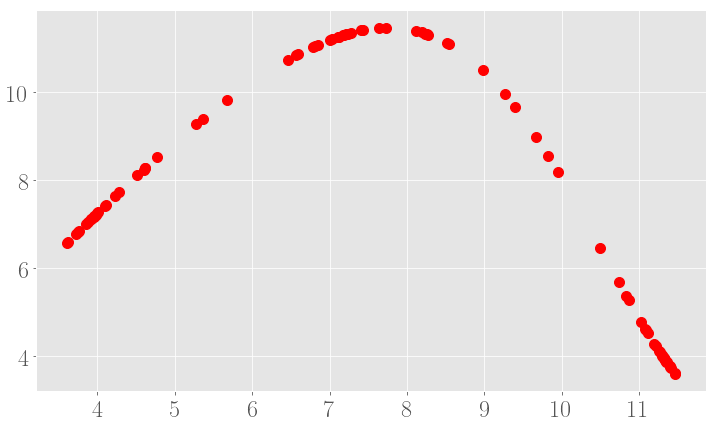

In [82]:
# Define parameters
initial = (8, 8, 8)
plt.figure(figsize = (12, 7))
t_vals = np.arange(0, 1000, 0.001)

c = 5.7


# Solve
x, y, z = solve_Rossler(t_vals, initial, c)

# Get extrema
x_cut = x[len(x)//2:]
x_extrema = give_extrema(x_cut)



plt.plot(x_extrema[:-1], x_extrema[1:], 'o', color = 'red')
#plt.savefig('rossler_1D_map.pdf', bbox_inches = 'tight')
plt.show()

## 6.3 - The logistic map

Define the logistic map as a function.

In [37]:
def logistic_map(x, r):
    '''The logistic map'''
    return r*x*(1-x)

In [38]:
def dv_logistic_map(x, r):
    '''Derivative of the logistic map (used to compute the Lyapunov exponent).'''
    return r - 2*r*x

In [36]:
def get_time_series(func, npoints, x0, r):
    x_vals = []
    
    for i in range(npoints):
        if i == 0:
            x_vals.append(x0)
        else:
            x_vals.append(func(x_vals[-1], r))
    return x_vals

In [254]:
def get_FP(r):
    return 1 - 1/r

In [255]:
def cobweb(func, npoints, x0, r, color = 'blue', cutoff = 0):
    '''One figure.'''
    x = get_time_series(func, npoints, x0, r)
    counter = 0
    
    for i in range(len(x) - 1):
        if i == 0 and cutoff == 0:
            plt.scatter(x[0], 0, color = color)
            plt.arrow(x[0], 0, 0, x[1], color = color)
        
        elif counter < cutoff:
            counter += 1
        
        else:
            Delta_x = x[i] - x[i - 1]
            plt.arrow(x[i - 1], x[i], Delta_x, 0, color = color)
            Delta_y = x[i+1] - x[i]
            plt.arrow(x[i], x[i], 0, Delta_y, color = color)
    
    ## Extra fancy stuff:
    x_vals = np.arange(0, 1, 0.001)
    y_vals = func(x_vals, r)
    
    plt.plot(x_vals, y_vals, color = 'black', alpha = 0.25)
    plt.plot(x_vals, x_vals, color = 'black', alpha = 0.25) # the curve y = x

In [256]:
def ax_cobweb(ax, func, npoints, x0, r, color = 'blue', cutoff = 0):
    '''Cobweb, but useful for a subplot.'''
    x = get_time_series(func, npoints, x0, r)
    counter = 0
    
    for i in range(len(x) - 1):
        if i == 0 and cutoff == 0:
            ax.scatter(x[0], 0, color = color)
            ax.arrow(x[0], 0, 0, x[1], color = color)
        
        elif counter < cutoff:
            counter += 1
        
        else:
            Delta_x = x[i] - x[i - 1]
            ax.arrow(x[i - 1], x[i], Delta_x, 0, color = color)
            Delta_y = x[i+1] - x[i]
            ax.arrow(x[i], x[i], 0, Delta_y, color = color)
    
    ## Extra fancy stuff:
    x_vals = np.arange(0, 1, 0.001) # the logistic map is between 0 and 1: ### CHANGE THIS???
    y_vals = func(x_vals, r)
    
    ax.plot(x_vals, y_vals, color = 'black', alpha = 0.25)
    ax.plot(x_vals, x_vals, color = 'black', alpha = 0.25) # the curve y = x

### 6.3.1 - Different behaviors

We want to look at time series and cobwebs to determine the different behaviors that can arise. We know there are stable fixed points for $r < 3$ (for $r < 1$: the origin, for $1 < r < 3$, the fixed point $x^*$).

$ \textbf{Stable fixed points for } 1 < r < 3 $ 

The following code block checks the above numerically. We sweep the values of $r$ between 1 and 3 (with a separation 0.01 between successive values of $r$), and for each value of $r$ generate a time series of length 600, starting from a certain set of initial conditions (here, we take a list $0.1, 0.2, \dots, 0.9$; exclude 0 and 1 since they map to 0 and remain there). Then we check if the separation between the last value and the supposed stable fixed point (which depends on the value of $r$) is greater than a certain threshold $\epsilon$, here taken to be $10^{-4}$. If so, then we print this observation. Hence if the run does not print anything, the above considerations are correct.

In [257]:
r_vals = np.arange(0, 3, 0.01)
npoints = 600
eps = 10**(-4)
initial_conditions = np.arange(0.1, 1, 0.1)

for r in r_vals:
    for initial in initial_conditions:
        x = get_time_series(logistic_map, npoints, initial, r)

        # For r < 1: should converge towards
        if r < 1:
            if abs(x[-1]) >= eps:
                print('No convergence to origin for r = %0.2f and x0 = %0.4f' % (r, initial))
        if r > 1:
            FP = get_FP(r)
            if abs(x[-1] - FP) >= eps:
                print('No convergence to x star for r = %0.2f and x0 = %0.4f' % (r, initial))

Nothing is printed, so the stability is verified numerically.

But what about $r = 1$? The linear stability analysis is inconclusive for this value of $r$, so we have to do a cobweb diagram. The plot below makes clear it is still stable, but the convergence is very slow for $x \approx 0$.

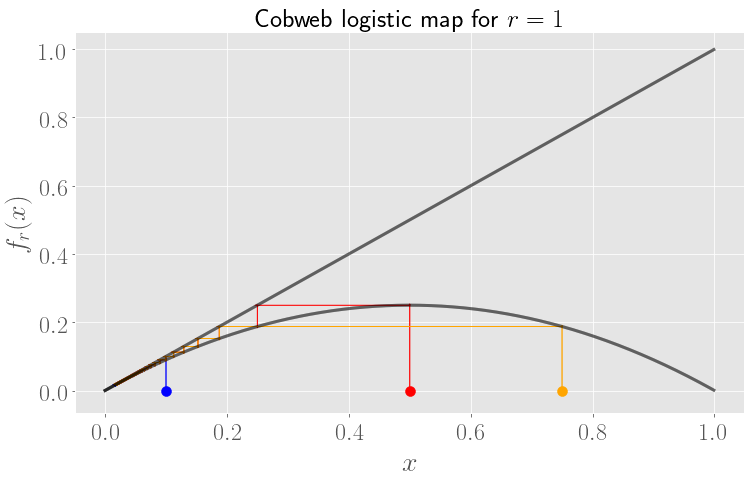

In [269]:
plt.figure(figsize = (12, 7))

r = 1
cobweb(logistic_map, 50, 0.10, r, color = 'blue')
cobweb(logistic_map, 50, 0.50, r, color = 'red')
cobweb(logistic_map, 50, 0.75, r, color = 'orange')

# Make fancy, save and show
plt.xlabel(r'$x$')
plt.ylabel(r'$f_r(x)$')
plt.title(r'Cobweb logistic map for $r = 1$')
plt.savefig('cobweb_logistic_r_1.pdf', bbox_inches = 'tight')
plt.show()

$ \textbf{Stable 2-cycles for } 3 < r < 1 + \sqrt{6} $

Do a cobweb for a value of $r$ that lies in this range.

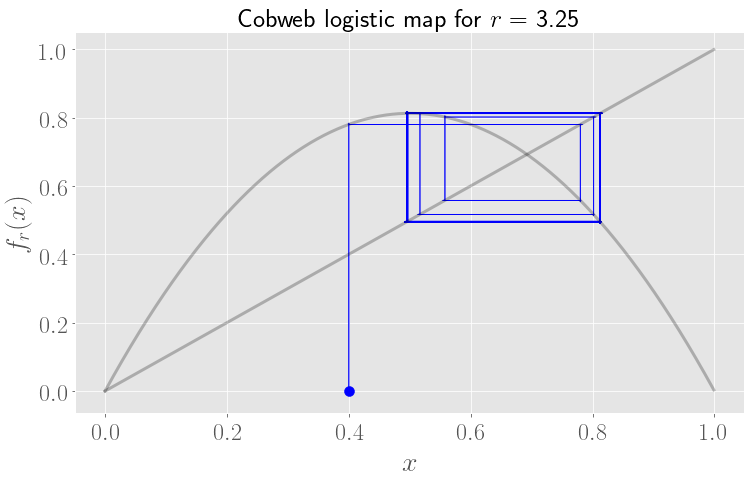

In [270]:
plt.figure(figsize = (12, 7))
r = 3.25

initial_conditions = [0.40] #, 0.50, 0.75]
color_list = ['blue'] #, 'red', 'orange']

for i in range(len(initial_conditions)):
    x0 = initial_conditions[i]; color = color_list[i]
    cobweb(logistic_map, 100, x0, r, color = color)


# Make fancy, save and show
plt.xlabel(r'$x$')
plt.ylabel(r'$f_r(x)$')
plt.title(r'Cobweb logistic map for $r = $ %0.2f' % (r))
plt.savefig('cobweb_logistic_2_cycle.pdf', bbox_inches = 'tight')
plt.show()

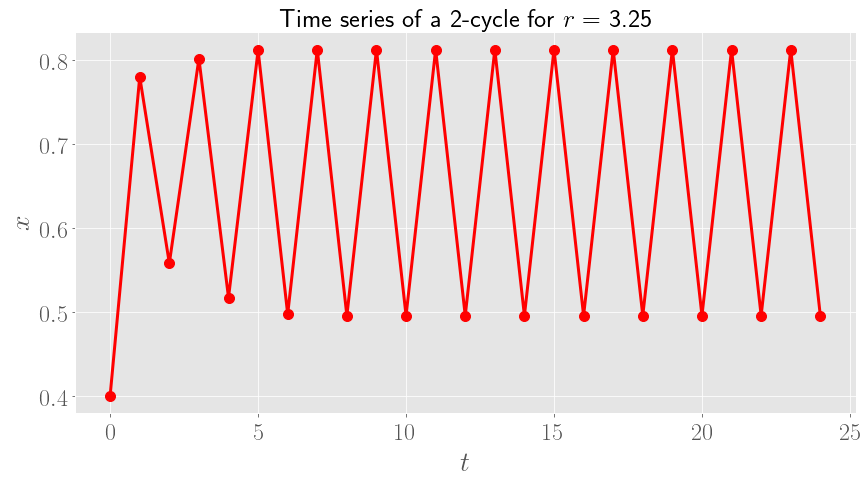

In [283]:
plt.figure(figsize = (14, 7))

r = 3.25
x0 = 0.4

x = get_time_series(logistic_map, 25, x0, r)
plt.plot([i for i in range(len(x))], x, '-o', color = 'red')

plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.title('Time series of a 2-cycle for $r = $ %0.2f' % (r))
plt.savefig('logistic_2_cycle_time_series.pdf', bbox_inches ='tight')
plt.show()

$ \textbf{Period-doubling for } r > 1  +\sqrt{6} $

Do a cobweb:

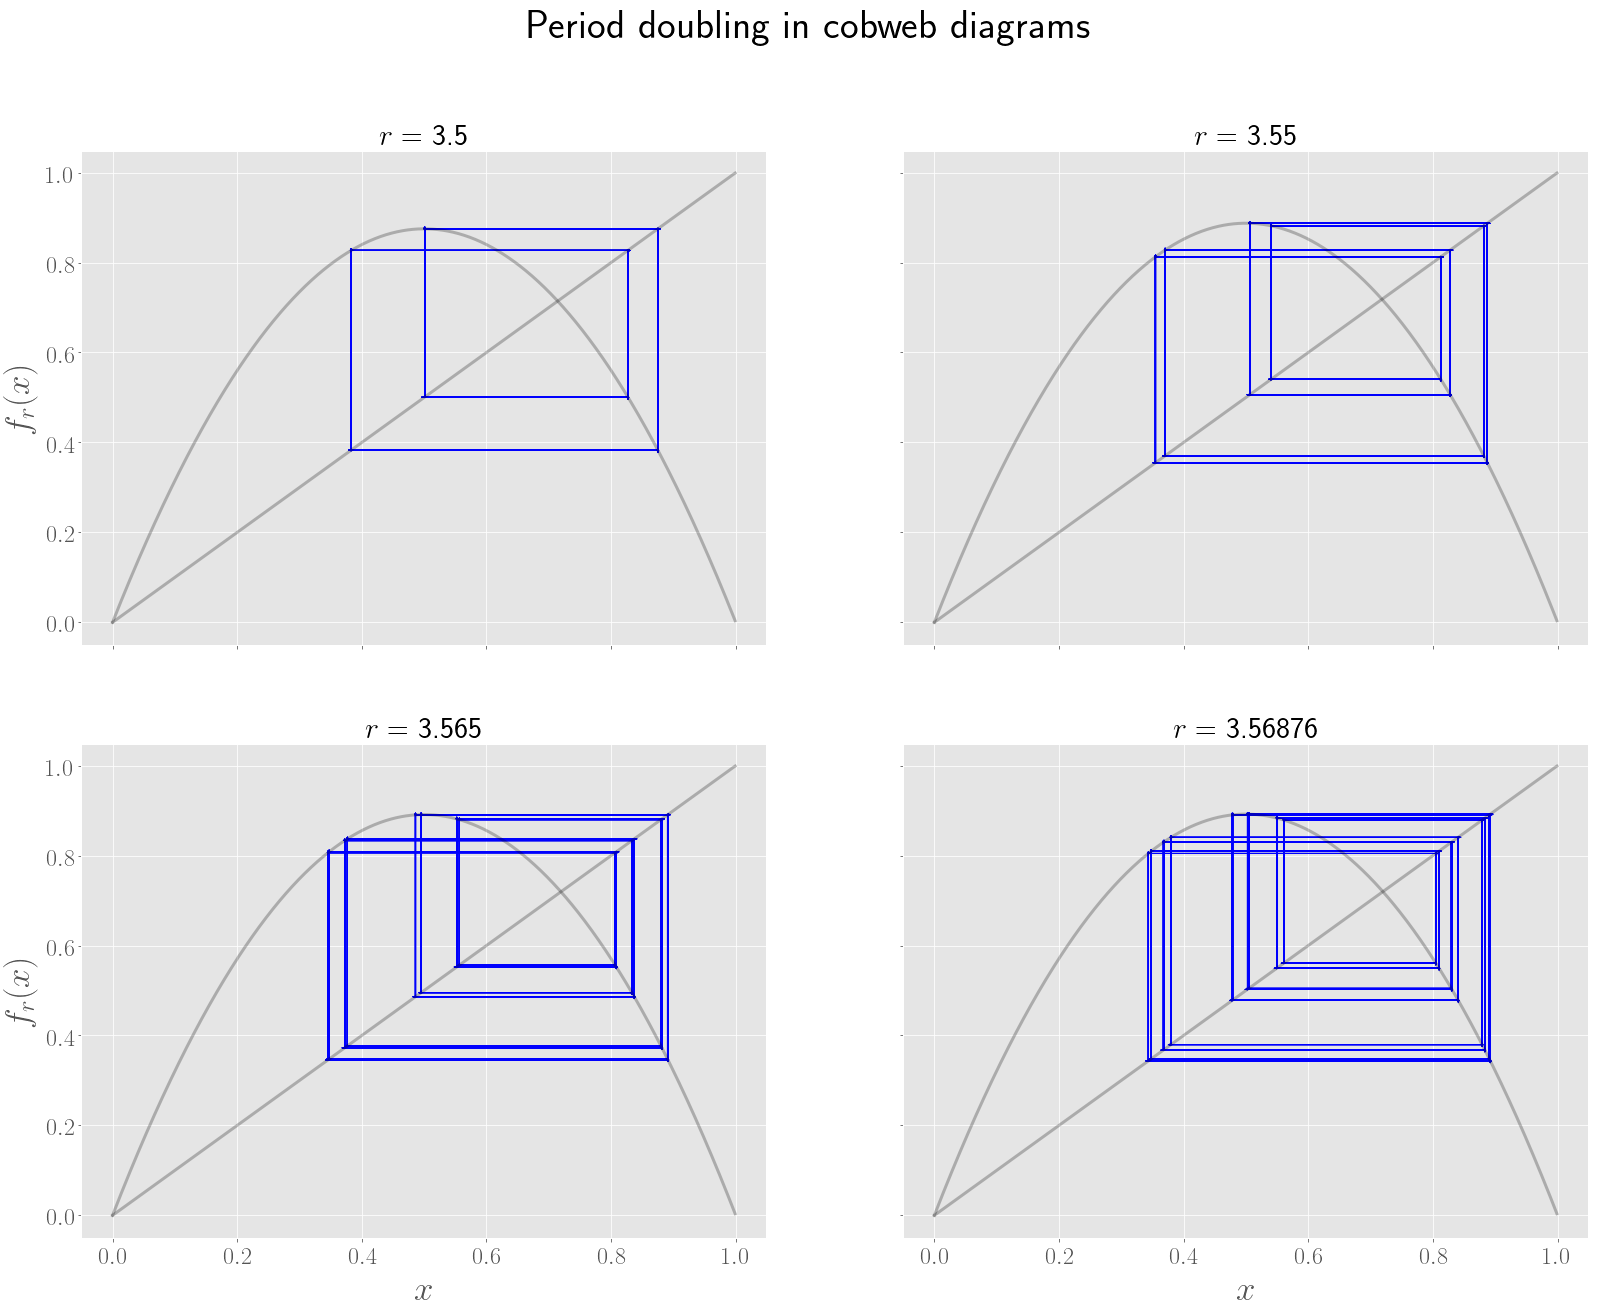

In [271]:
fig, axs = plt.subplots(2, 2, figsize = (27, 20))

r_vals = [3.5, 3.55, 3.565, 3.56876]
x0 = 0.4
f = 35 # fontsize for x labels

for i in range(4):
    ax = axs[i//2, i%2]; r = r_vals[i]
    ax_cobweb(ax, logistic_map, 400, x0, r, cutoff = 200)
    ax.set_xlabel(r'$x$', fontsize = f)
    ax.set_ylabel(r'$f_r(x)$', fontsize = f)
    ax.set_title(r'$r = $ %s' % str(r), fontsize = 30)


# Make fancy, save and show
for ax in fig.get_axes():
    ax.label_outer()
    
plt.suptitle(r'Period doubling in cobweb diagrams', fontsize = 40)
plt.savefig('cobweb_logistic_period_doubling.pdf', bbox_inches = 'tight')
plt.show()

Plot the time series

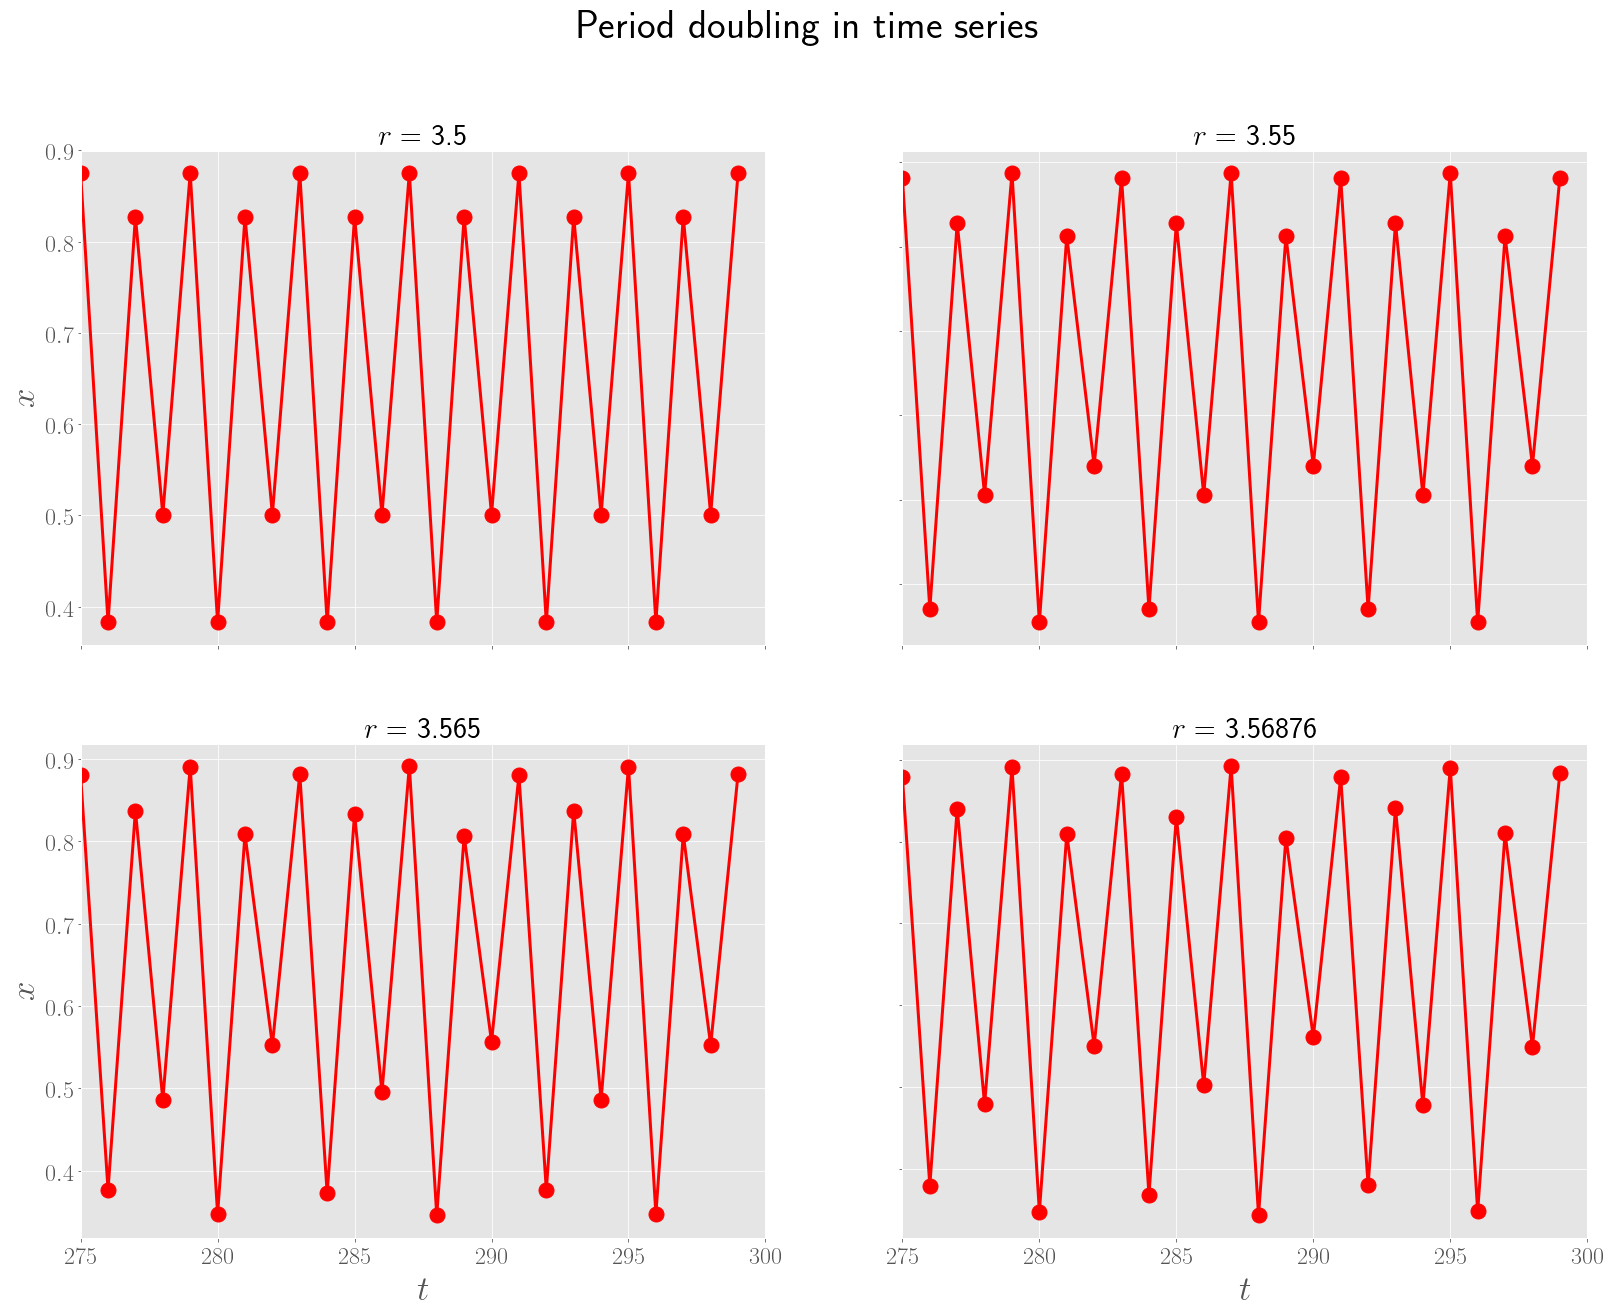

In [282]:
fig, axs = plt.subplots(2, 2, figsize = (27, 20))

r_vals = [3.5, 3.55, 3.565, 3.56876]
x0 = 0.4
f = 35 # fontsize for x and y labels

for i in range(4):
    ax = axs[i//2, i%2]; r = r_vals[i]
    x = get_time_series(logistic_map, 300, x0, r)
    ax.plot([i for i in range(len(x))], x, '-o', markersize = 15, color = 'red')
    
    ax.set_title(r'$r = $ %s' % str(r), fontsize = 30)
    ax.set_xlabel(r'$t$', fontsize = f)
    ax.set_xlim(275, 300)
    ax.set_ylabel(r'$x$', fontsize = f)


# Make fancy, save and show
for ax in fig.get_axes():
    ax.label_outer()
plt.suptitle('Period doubling in time series', fontsize = 40)
plt.savefig('logistic_period_doubling_time_series.pdf', bbox_inches ='tight')
plt.show()

$ \textbf{Above } r_\infty $

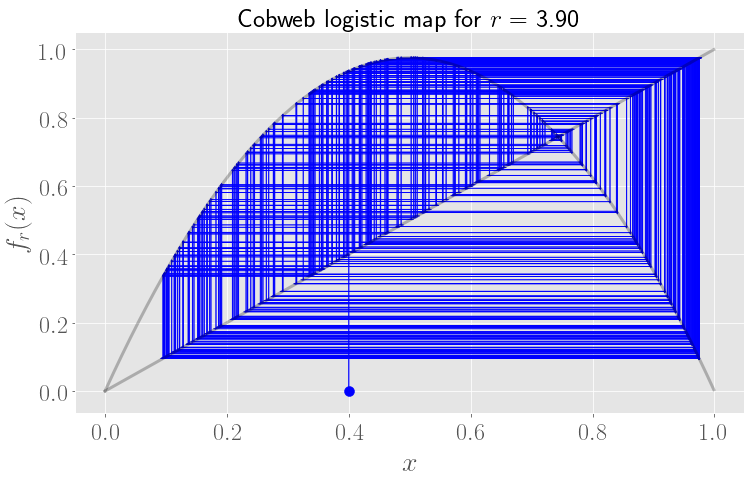

In [272]:
plt.figure(figsize = (12, 7))

r = 3.9
x0 = 0.4

for i in range(len(initial_conditions)):
    cobweb(logistic_map, 300, x0, r)


# Make fancy, save and show
plt.xlabel(r'$x$')
plt.ylabel(r'$f_r(x)$')
plt.title(r'Cobweb logistic map for $r = $ %0.2f' % (r))
plt.savefig('cobweb_logistic_chaos.pdf', bbox_inches = 'tight')
plt.show()

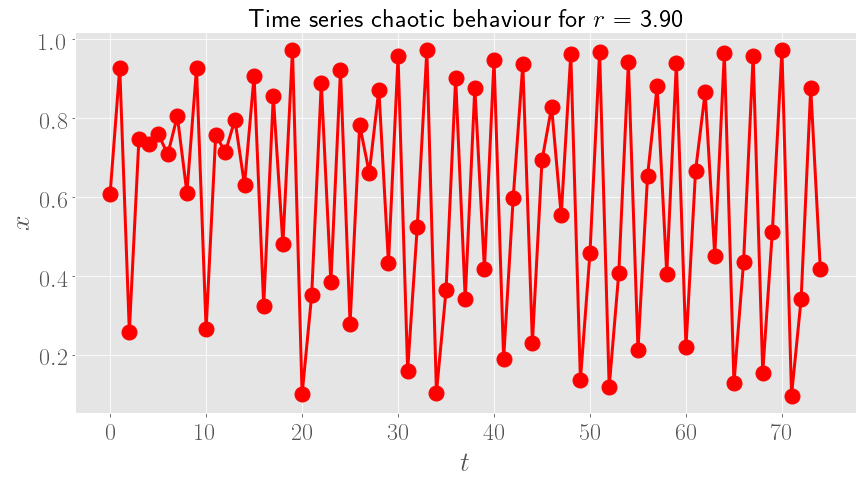

In [281]:
plt.figure(figsize = (14, 7))

r = 3.9
x0 = 0.4

x = get_time_series(logistic_map, 100, x0, r)
x_cut = x[25:]
plt.plot([i for i in range(len(x_cut))], x_cut, '-o', markersize = 15, color = 'red')

plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.title('Time series chaotic behaviour for $r = $ %0.2f' % (r))
plt.savefig('logistic_chaos_time_series.pdf', bbox_inches ='tight')
plt.show()

To check if we have sensitive dependence on initial conditions, compute the Lyapunov exponent.

In [32]:
def compute_Lyapunov_exponent(func, dv_func, r, x0, n = 1000):
    '''Computes the Lyapunov exponent for a 1D map, func, (also give its derivative, dv_func), and a specific value of the parameter.'''
    result = 0
    
    # Let the system equilibriate for a while
    x = x0
    for i in range(300):
        new_x = logistic_map(x, r)
        x = new_x
    
    # Now, x is a good initial condition such that transients have decayed
    for i in range(n):
        new_x = func(x, r)
        
        #term = np.log(abs(r - 2*r*new_x)) ### logistic map only!!!
        
        term = np.log(abs(dv_func(new_x, r)))
        
        result += term
        x = new_x
    
    return result/(n)

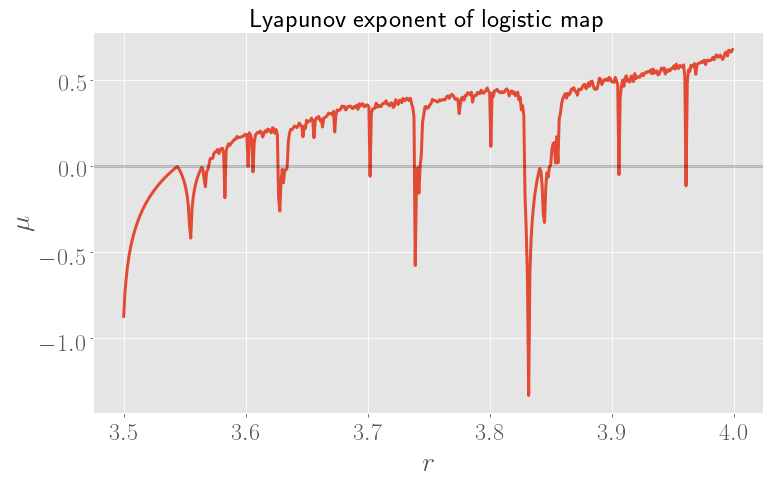

In [54]:
r_vals = np.arange(3.5, 4, 0.001)
y_vals = []

for r in r_vals:
    mu = compute_Lyapunov_exponent(logistic_map, dv_logistic_map, r, 0.4)
    y_vals.append(mu)
    
plt.figure(figsize = (12, 7))
plt.plot(r_vals, y_vals)
plt.axhline(y = 0, color='black', alpha = 0.2)

# Make fancy, save and show
plt.xlabel(r'$r$')
plt.ylabel(r'$\mu$')
plt.title('Lyapunov exponent of logistic map')
plt.savefig('logistic_map_lyapunov.pdf', bbox_inches = 'tight')
plt.show()

### 6.3.3 - Orbit diagram (for $r > 3.4$)

In [10]:
def draw_orbit_diagram(func, r_vals, s = 5, alpha = 0.06, color = 'black'):
    '''Draws orbit diagram for a 1D map such as logistic, sine and tent map.'''
    plt.figure(figsize = (26, 15))
    
    x0 =0.5 
    test = []
    for r in r_vals:
        # List for x values we will plot later
        x_plot = []
        
#         # Keep track of how far we are in the calculations
#         if np.round(0.1*(r//0.1), 2) not in test:
#             print(np.round(0.1*(r//0.1), 2))
#             test.append(np.round(0.1*(r//0.1), 2))
        
        # Let it equilibriate - don't save x values, don't need them and they are a waste of computational sources
        x = x0
        for i in range(300):
            new_x = func(x, r)
            x = new_x
        # Now, x is an initial condition without transient phase!
        
        # Each value is an attractor, or shows chaos
        for i in range(300):
            new_x = func(x, r)
            x = new_x
            x_plot.append(x)
            
        # Now plot all points
        plt.plot([r for x in x_plot], x_plot, 'o', color = color, markersize = s, alpha = alpha)

In [37]:
# # Choose the r values that we're going to consider
# r_vals = np.arange(3.4, 3.998, 0.002)

# # Draw the orbit diagram
# draw_orbit_diagram(logistic_map, r_vals, alpha = 0.1)

# # Make fancy
# plt.xlabel(r'$r$', fontsize = 50)
# plt.ylabel(r'$x$', fontsize = 50)
# plt.xticks(fontsize = 25)
# plt.yticks(fontsize = 25)
# plt.ylim(0, 1)
# plt.xlim(3.4, 3.999)
# plt.title('Orbit diagram logistic map', fontsize = 45)

# # Save and show 
# plt.savefig('logistic_orbit_diagram_Y.pdf', bbox_inches = 'tight')
# plt.show()

## 6.4 - Sine and tent map

In [3]:
def sine_map(x, r):
    '''Defined for x and r between 0 and 1'''
    return r*np.sin(np.pi*x)

In [4]:
def tent_map(x, r):
    '''Defined for r between 0 and 2'''
    if x >= 0 and x <= 0.5:
        return r*x
    else:
        return r*(1 - x)

### 6.4.1 - Sine map

Let's see how this dynamics looks like.

In [23]:
# # Choose the r values that we're going to consider
# r_vals = np.arange(0, 1, 0.05)

# # Draw the orbit diagram
# draw_orbit_diagram(sine_map, r_vals, alpha = 0.2)

# # Make fancy, save and show
# plt.xlabel(r'$r$', fontsize = 50)
# plt.ylabel(r'$x$', fontsize = 50)
# plt.xticks(fontsize = 25)
# plt.yticks(fontsize = 25)
# plt.ylim(0, 1)
# plt.title('Orbit diagram sine map', fontsize = 45)

# # Save and show 
# plt.savefig('sine_orbit_diagram_X.pdf', bbox_inches = 'tight')
# plt.show()

Interesting things seem to start around $r = 0.82$, so do a close-up and more precise sweep of that part.

In [20]:
# # Choose the r values that we're going to consider
# r_vals = np.arange(0.82, 1, 0.0005)

# # Draw the orbit diagram
# draw_orbit_diagram(sine_map, r_vals, alpha = 0.075)


# # Make fancy, save and show
# plt.xlabel(r'$r$', fontsize = 50)
# plt.ylabel(r'$x$', fontsize = 50)
# plt.xticks(fontsize = 25)
# plt.yticks(fontsize = 25)
# plt.ylim(0, 1)
# plt.title('Orbit diagram sine map', fontsize = 45)

# # Save and show 
# plt.savefig('sine_orbit_diagram_Y.pdf', bbox_inches = 'tight')
# plt.show()

There is a period-doubling cascade to chaos, so we can determine the values $r_n$.

Is the sine map chaotic?

In [41]:
def dv_sine_map(x, r):
    return r*np.pi*np.cos(np.pi*x)

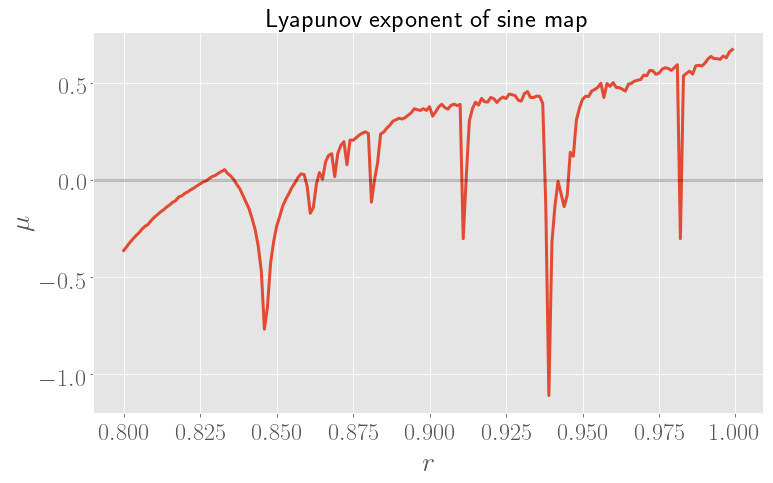

In [50]:
r_vals = np.arange(0.8, 1, 0.001)
y_vals = []

for r in r_vals:
    mu = compute_Lyapunov_exponent(sine_map, dv_sine_map, r, 0.4)
    y_vals.append(mu)
    
plt.figure(figsize = (12, 7))
plt.plot(r_vals, y_vals)
plt.axhline(y = 0, color='black', alpha = 0.2)

# Make fancy, save and show
plt.xlabel(r'$r$')
plt.ylabel(r'$\mu$')
plt.title('Lyapunov exponent of sine map')
plt.savefig('sine_map_lyapunov.pdf', bbox_inches = 'tight')
plt.show()

$ \textbf{Universality} $

The behaviour is similar for both: estimate the Feigenbaum constant using the sine map.

In [60]:
crit_r_vals = [0.72, 0.8333, 0.8586, 0.8641, 0.8653]

Use the last three values to get the best estimate.

In [61]:
delta = (crit_r_vals[-2] - crit_r_vals[-3])/(crit_r_vals[-1] - crit_r_vals[-2])
delta

4.583333333333372

### 6.4.2 - Tent map

In [21]:
# # Choose the r values that we're going to consider
# r_vals = np.arange(0, 2, 0.05)

# # Draw the orbit diagram

# draw_orbit_diagram(tent_map, r_vals, alpha = 0.2)

# # Make fancy, save and show
# plt.xlabel(r'$r$', fontsize = 50)
# plt.ylabel(r'$x$', fontsize = 50)
# plt.xticks(fontsize = 25)
# plt.yticks(fontsize = 25)
# plt.ylim(0, 1)
# plt.title('Orbit diagram tent map', fontsize = 45)

# # Save and show 
# plt.savefig('tent_orbit_diagram_X.pdf', bbox_inches = 'tight')
# plt.show()

Around $r = 1$, the interesting stuff starts to happen, so do a more detailed sweep there.

In [33]:
# # Choose the r values that we're going to consider
# r_vals = np.arange(1, 2, 0.003)

# # Draw the orbit diagram
# draw_orbit_diagram(tent_map, r_vals, alpha = 0.08)

# # Make fancy, save and show
# plt.xlabel(r'$r$', fontsize = 50)
# plt.ylabel(r'$x$', fontsize = 50)
# plt.xticks(fontsize = 25)
# plt.yticks(fontsize = 25)
# plt.ylim(0, 1)
# plt.title('Orbit diagram tent map', fontsize = 45)
# # Save and show 
# plt.savefig('tent_orbit_diagram_Y.pdf', bbox_inches = 'tight')
# plt.show()

The tent map is chaotic for $1 \leq r \leq 2$ (see the report). 

Finally, plot all three curves.

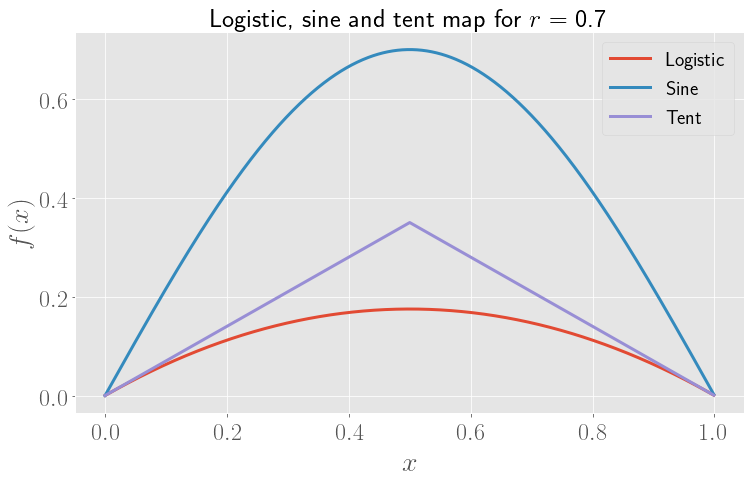

In [65]:
r = 0.7

x_vals = np.arange(0, 1, 0.001)
func_list = [logistic_map, sine_map, tent_map]
label_list = ['Logistic', 'Sine', 'Tent']

plt.figure(figsize = (12, 7))
for i in range(len(func_list)):
    func = func_list[i]; label = label_list[i]
    
    y_vals = [] # cumbersome, but cannot compute with tent map using arrays
    
    for x in x_vals:
        y_val = func(x, r)
        y_vals.append(y_val)
    plt.plot(x_vals, y_vals, label = label)

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend(fontsize = 20)
plt.title(r'Logistic, sine and tent map for $r = $ % 0.1f' % r)
plt.savefig('logistic_sine_tent_maps.pdf', bbox_inches = 'tight')
plt.show()